[<span style="color:#FF7B07">**1. Import Libraries and Load Data**](#1)<br>
[<span style="color:#FF7B07">**2. Balance Data**](#2)<br>
[<span style="color:#FF7B07">**3. Create & Test Model**](#3)<br> 
[<span style="color:#FF7B07">**4. Reduce Data Features & Test**](#4)<br>
[<span style="color:#FF7B07">**5. Summary**](#5)<br> 

# <span style="color:#FF7B07"><div align="center">**Import Libraries and Load Data** <a  name="1"></a>

In [6]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition
import itertools

%matplotlib inline

In [7]:
# The data is large and this command will help us to see the whole result 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
data = pd.read_csv('../data/data_for_predit_reach_goal.csv')

##### <span style="color:#FF7B07"> We use the first 7 days in input and the last 5 days for output so we need applicants who have at least 12 days of log. <br> To be definitely sure I leave users who has 30 or more days of logs

In [9]:
data = data[data["logged_frequency"]>30]

In [56]:
data["reach_goal"].value_counts()

0.0    2196
1.0     950
Name: reach_goal, dtype: int64

##### <span style="color:#00CC00"> As you see data is imbalanced so we need to handle this

In [11]:
print(f'\n Data shape - {data.shape} ')
print(f' Unique users - {data["user_id"].nunique()} \n')
data.head(1)


 Data shape - (3146, 207) 
 Unique users - 3146 



,user_id,total_calories,total_carbs,total_fat,total_protein,total_sodium,total_sugar,goal_calories,goal_carbs,goal_fat,goal_protein,goal_sodium,goal_sugar,foods_len,healtyDistrib,calories_diff,carbs_diff,fat_diff,protein_diff,sodium_diff,sugar_diff,total_calories_1,total_carbs_1,total_fat_1,total_protein_1,total_sodium_1,total_sugar_1,goal_calories_1,goal_carbs_1,goal_fat_1,goal_protein_1,goal_sodium_1,goal_sugar_1,foods_len_1,healtyDistrib_1,calories_diff_1,carbs_diff_1,fat_diff_1,protein_diff_1,sodium_diff_1,sugar_diff_1,total_calories_2,total_carbs_2,total_fat_2,total_protein_2,total_sodium_2,total_sugar_2,goal_calories_2,goal_carbs_2,goal_fat_2,goal_protein_2,goal_sodium_2,goal_sugar_2,foods_len_2,healtyDistrib_2,calories_diff_2,carbs_diff_2,fat_diff_2,protein_diff_2,sodium_diff_2,sugar_diff_2,total_calories_3,total_carbs_3,total_fat_3,total_protein_3,total_sodium_3,total_sugar_3,goal_calories_3,goal_carbs_3,goal_fat_3,goal_protein_3,goal_sodium_3,goal_sugar_3,foods_len_3,healtyDistrib_3,calories_diff_3,carbs_diff_3,fat_diff_3,protein_diff_3,sodium_diff_3,sugar_diff_3,total_calories_4,total_carbs_4,total_fat_4,total_protein_4,total_sodium_4,total_sugar_4,goal_calories_4,goal_carbs_4,goal_fat_4,goal_protein_4,goal_sodium_4,goal_sugar_4,foods_len_4,healtyDistrib_4,calories_diff_4,carbs_diff_4,fat_diff_4,protein_diff_4,sodium_diff_4,sugar_diff_4,total_calories_5,total_carbs_5,total_fat_5,total_protein_5,total_sodium_5,total_sugar_5,goal_calories_5,goal_carbs_5,goal_fat_5,goal_protein_5,goal_sodium_5,goal_sugar_5,foods_len_5,healtyDistrib_5,calories_diff_5,carbs_diff_5,fat_diff_5,protein_diff_5,sodium_diff_5,sugar_diff_5,total_calories_6,total_carbs_6,total_fat_6,total_protein_6,total_sodium_6,total_sugar_6,goal_calories_6,goal_carbs_6,goal_fat_6,goal_protein_6,goal_sodium_6,goal_sugar_6,foods_len_6,healtyDistrib_6,calories_diff_6,carbs_diff_6,fat_diff_6,protein_diff_6,sodium_diff_6,sugar_diff_6,total_calories_7,total_carbs_7,total_fat_7,total_protein_7,total_sodium_7,total_sugar_7,goal_calories_7,goal_carbs_7,goal_fat_7,goal_protein_7,goal_sodium_7,goal_sugar_7,foods_len_7,healtyDistrib_7,calories_diff_7,carbs_diff_7,fat_diff_7,protein_diff_7,sodium_diff_7,sugar_diff_7,total_calories_8,total_carbs_8,total_fat_8,total_protein_8,total_sodium_8,total_sugar_8,goal_calories_8,goal_carbs_8,goal_fat_8,goal_protein_8,goal_sodium_8,goal_sugar_8,foods_len_8,healtyDistrib_8,calories_diff_8,carbs_diff_8,fat_diff_8,protein_diff_8,sodium_diff_8,sugar_diff_8,total_calories_9,total_carbs_9,total_fat_9,total_protein_9,total_sodium_9,total_sugar_9,goal_calories_9,goal_carbs_9,goal_fat_9,goal_protein_9,goal_sodium_9,goal_sugar_9,foods_len_9,healtyDistrib_9,calories_diff_9,carbs_diff_9,fat_diff_9,protein_diff_9,sodium_diff_9,sugar_diff_9,logged_frequency,start_date,days_missed,is_180_diet,reach_goal,FoodGroup
0,1.0,0.524046,0.168717,0.15812,0.159744,0.113894,0.01426,0.372187,0.317666,0.24186,0.21123,0.418182,0.011132,0.067797,0.034141,0.363905,0.572824,0.531616,0.483384,0.680708,0.400831,0.401553,0.27768,0.230769,0.364217,0.295058,0.022635,0.433783,0.371151,0.283721,0.245989,0.418182,0.013019,0.084746,0.037289,0.470113,0.547069,0.512881,0.406344,0.558559,0.397626,0.485443,0.328647,0.25641,0.313099,0.235114,0.023766,0.398958,0.340357,0.260465,0.227273,0.418182,0.011887,0.101695,0.003663,0.40136,0.50444,0.487119,0.41994,0.598976,0.39632,0.431529,0.198594,0.346154,0.645367,0.146663,0.016071,0.378109,0.322528,0.246512,0.213904,0.418182,0.011321,0.084746,0.227308,0.42214,0.560391,0.430913,0.255287,0.658613,0.4,0.465387,0.316344,0.380342,0.367412,0.266152,0.019013,0.376214,0.320908,0.246512,0.213904,0.418182,0.011321,0.118644,0.108376,0.400975,0.5,0.412178,0.386707,0.578049,0.398457,0.580332,0.495606,0.393162,0.690096,0.349407,0.03033,0.668562,0.570502,0.432558,0.379679,0.418182,0.02,0.169492,0.038462,0.490893,0.546181,0.498829,0.327795,0.521915,0.397982,0.544317,0.393673,0.264957,0.42492,0.34661,0.024898,0.513385,0.439222,0.334884,0.291444,0.418182,0

#### <span style="color:#FF7B07"> Let's split data and drop some features which we should not use for modeling <br> 
- ##### <span style="color:#FF7B07"> dropped goal: we already have feature _diff which is linear combination of total and goal nutritient
- ##### <span style="color:#FF7B07"> dropped user_id: it's a feature which identifies the user so we don't need it
- ##### <span style="color:#FF7B07"> dropped reach_goal: it's our output
- ##### <span style="color:#FF7B07"> dropped logged frequency: it's contains information about feature
- ##### <span style="color:#FF7B07"> dropped is_180_diet: this feature created for another model

In [12]:
drop_col = list(filter(lambda x: ("goal" in x) or ("is_180_diet" in x) or ("user_id" in x) or ("reach_goal" in x) or ("logged_frequency" in x), data.columns))

In [13]:
X = data.drop(columns=drop_col)
y = data['reach_goal']
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# <span style="color:#FF7B07"><div align="center">**Balance Data** <a  name="2"></a>

##### <span style="color:#FF7B07"> As we saw data is imbalanced so SMOTE algorithm is enough to handle this problem

In [14]:
sm = SMOTE(random_state=42)

X_train_s,y_train_s =sm.fit_sample(X_train,y_train)
X_test_s,y_test_s =sm.fit_sample(X_test,y_test)

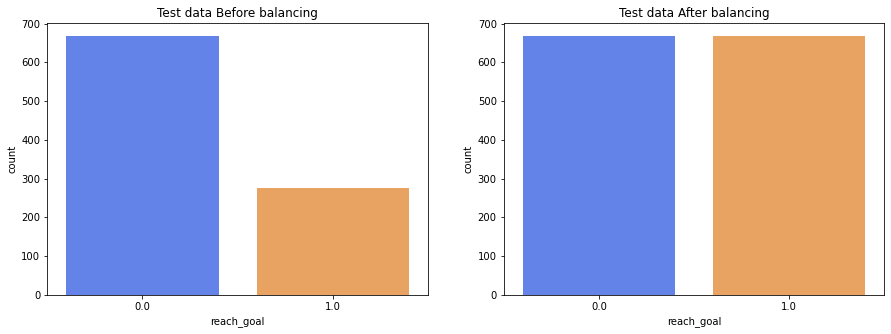

In [15]:
f, ax  = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x = y_test,ax=ax[0],palette = 'bright',alpha=0.7,).set_title('Test data Before balancing')
sns.countplot(x = y_test_s,ax=ax[1],palette = 'bright',alpha=0.7).set_title('Test data After balancing')

plt.show()

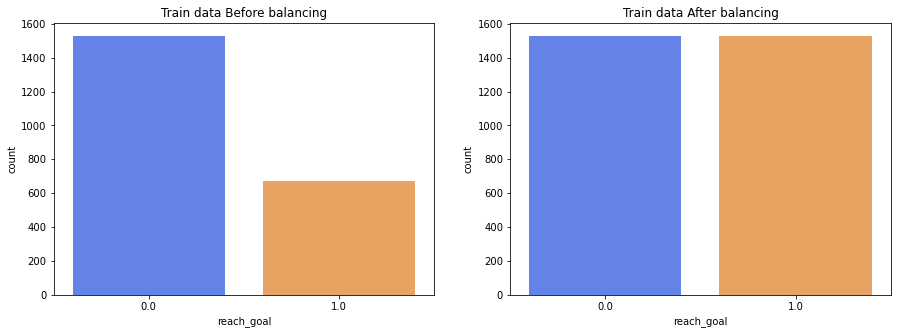

In [16]:
f, ax  = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x = y_train,ax=ax[0],palette = 'bright',alpha=0.7).set_title('Train data Before balancing')
sns.countplot(x = y_train_s,ax=ax[1],palette = 'bright',alpha=0.7).set_title('Train data After balancing')
plt.show()

X_train, y_train, X_test, y_test = X_train_s, y_train_s, X_test_s, y_test_s

# <span style="color:#FF7B07"><div align="center">**Create & Test Model** <a  name="3"></a>

##### <span style="color:#FF7B07"> Before Create a model, let's check our features

In [17]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
importance_df = pd.DataFrame(columns=['feature','importance'])
importance_df['feature'] = X_train.columns
importance_df['importance'] = importance
importance_df.sort_values(by=['importance'],ascending = False).T

,142,5,54,13,93,14,59,0,63,1,12,140,25,7,10,9,11,38,102,110,66,105,41,31,70,141,139,87,19,85,96,4,53,2,98,78,109,33,117,81,137,119,64,111,120,114,92,27,17,22,62,28,15,83,112,136,100,45,36,91,134,138,52,113,76,107,106,3,34,46,23,72,94,125,18,133,73,26,84,21,37,86,6,77,56,39,40,128,95,75,8,68,122,108,42,35,44,65,74,89,50,104,99,69,61,118,80,48,121,103,49,116,71,51,129,16,20,135,32,60,130,101,29,24,30,88,82,132,131,43,55,127,126,79,124,123,97,47,67,58,57,115,90
feature,FoodGroup,total_sugar,sodium_diff_3,sugar_diff,carbs_diff_6,total_calories_1,total_protein_4,total_calories,healtyDistrib_4,total_carbs,sodium_diff,start_date,protein_diff_1,healtyDistrib,fat_diff,carbs_diff,protein_diff,fat_diff_2,total_sodium_7,sodium_diff_7,fat_diff_4,healtyDistrib_7,sugar_diff_2,total_protein_2,total_calories_5,days_missed,sugar_diff_9,total_protein_6,total_sugar_1,total_carbs_6,sodium_diff_6,total_sodium,protein_diff_3,total_fat,total_calories_7,calories_diff_5,protein_diff_7,total_sugar_2,total_sugar_8,protein_diff_5,protein_diff_9,healtyDistrib_8,calories_diff_4,sugar_diff_7,calories_diff_8,total_fat_8,calories_diff_6,sugar_diff_1,total_protein_1,calories_diff_1,foods_len_4,total_calories_2,total_carbs_1,sugar_diff_5,total_calories_8,fat_diff_9,total_fat_7,total_protein_3,calories_diff_2,healtyDistrib_6,calories_diff_9,sodium_diff_9,fat_diff_3,total_carbs_8,foods_len_5,carbs_diff_7,calories_diff_7,total_protein,foods_len_2,total_sodium_3,carbs_diff_1,total_fat_5,fat_diff_6,sugar_diff_8,total_sodium_1,healtyDistrib_9,total_protein_5,sodium_diff_1,total_calories_6,healtyDistrib_1,carbs_diff_2,total_fat_6,foods_len,healtyDistrib_5,total_calories_4,protein_diff_2,sodium_diff_2,total_fat_9,protein_diff_6,total_sugar_5,calories_diff,sodium_diff_4,fat_diff_8,fat_diff_7,total_calories_3,healtyDistrib_2,total_fat_3,carbs_diff_4,total_sodium_5,total_sugar_6,calories_diff_3,foods_len_7,total_carbs_7,sugar_diff_4,total_sugar_4,foods_len_8,fat_diff_5,foods_len_3,carbs_diff_8,total_sugar_7,healtyDistrib_3,total_sodium_8,total_carbs_5,carbs_diff_3,total_protein_9,total_fat_1,foods_len_1,carbs_diff_9,total_sodium_2,total_sodium_4,total_sodium_9,total_protein_7,total_carbs_2,fat_diff_1,total_fat_2,total_sodium_6,sodium_diff_5,foods_len_9,total_sugar_9,total_carbs_3,sugar_diff_3,total_carbs_9,total_calories_9,carbs_diff_5,sodium_diff_8,protein_diff_8,sugar_diff_6,total_sugar_3,protein_diff_4,total_fat_4,total_carbs_4,total_protein_8,foods_len_6
importance,0.21211,0.0524344,0.0250898,0.0204777,0.0174353,0.015324,0.0153099,0.0150823,0.0146204,0.0141412,0.0135699,0.0129921,0.0121958,0.0119584,0.0117349,0.0116446,0.0115202,0.0114194,0.0109513,0.0102758,0.0101968,0.0101388,0.0099749,0.00972772,0.00962663,0.00929436,0.00907586,0.00900556,0.00897612,0.00896399,0.00880307,0.00850353,0.00833853,0.00831269,0.00825349,0.00800576,0.00797832,0.0078915,0.00776368,0.0076725,0.00766093,0.00746904,0.00745702,0.00743832,0.00731993,0.00731561,0.00725344,0.00724142,0.00719887,0.00716225,0.00713378,0.00708317,0.00706735,0.00693661,0.00683771,0.00653241,0.00649214,0.00647017,0.00579482,0.0052052,0.00501292,0.00470538,0.00469788,0.00468711,0.00457517,0.00452758,0.00450801,0.00444642,0.00440492,0.00426337,0.00417666,0.00413745,0.00412099,0.00399985,0.00370855,0.00362619,0.00357902,0.00356419,0.00353635,0.00350598,0.0034904,0.00344337,0.00344086,0.00341593,0.00336219,0.00314847,0.00314136,0.00310963,0.00288503,0.00259841,0.00247658,0.00236083,0.00235602,0.00229403,0.00224663,0.00223857,0.00223307,0.00221216,0.00203923,0.00196335,0.00196335,0.00196335,0.0019518,0.00158135,0.00157068,0.0013089,0.00126042,0.00116794,0.00116202,0.00114529,0.00113008,0.0011049,0.00104712,0.000981675,0.000981675,0.000981675,0.0008726,0.0008726,0.00065445,0.000631487,0.000628272,0.000627068,0.000310444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### <span style="color:#00CC00"> As you see the most important feature is the FoodGroup <br> It should be noted that we have many features and need to drop some of them

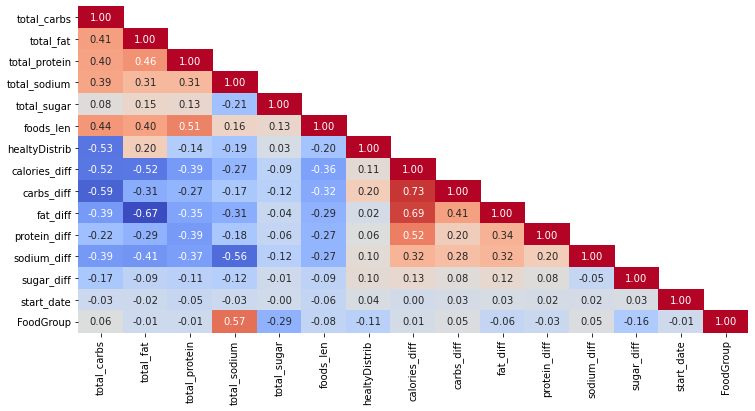

In [18]:
matrix = data[['total_carbs', 'total_fat', 'total_protein', 'total_sodium', 'total_sugar', 'foods_len', 
          'healtyDistrib', 'calories_diff', 'carbs_diff', 'fat_diff', 'protein_diff', 'sodium_diff', 'sugar_diff', 
          'start_date', 'FoodGroup']].corr()
f, ax = plt.subplots(figsize=(12, 6))
with sns.axes_style("white"):
    sns.heatmap(matrix,mask=np.triu(matrix,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="coolwarm");

##### <span style="color:#00CC00"> Heatmap is not enough in this case because we have a lot of features <br> But what we can see it that calories and carbs are depended on each other so we may drop one of them

##### <span style="color:#FF7B07"> firstly create baseline model and check metrics

In [19]:
def classification_metrics(yTrueTrain,yPredictTrain,yTrueTest,yPredictTest,heatmap=False)->None:
    """
    this function prints accuracy, precision, recall, F1 scre 
    and create confusion matrix  heatmap for both train and test sets
    
    Arguments:
    yTrueTrain -- the true value of prediction from the train set
    yPredictTrain -- predicted value from the train set
    yTrueTest -- he true value of prediction from the test set
    yPredictTest -- predicted value from the test set
    heatmap -- boolean which tells us if plot heatmap or not
    
    Returns:
    None
    """
    print("train data:\t  "+ "\t"*6+ "test data:\t\n")
    print(("accuracy:\t {0} "+ "\t"*6+ "accuracy:\t {1}").format(accuracy_score(yTrueTrain, yPredictTrain).round(2), 
                                                                 accuracy_score(yTrueTest, yPredictTest).round(2)))
          
    print(("precision:\t {0} "+ "\t"*6+ "precision:\t {1}").format(precision_score(yTrueTrain, yPredictTrain).round(2), 
                                                                   precision_score(yTrueTest, yPredictTest).round(2)))
    
    print(("recall:\t\t {0} "+ "\t"*6+ "recall:\t\t {1}").format(recall_score(yTrueTrain, yPredictTrain).round(2), 
                                                                 recall_score(yTrueTest, yPredictTest).round(2)))
    
    print(("F1:\t\t {0} "+ "\t"*6+ "F1:\t\t {1}").format(f1_score(yTrueTrain, yPredictTrain).round(2), 
                                                         f1_score(yTrueTest, yPredictTest).round(2)))
    if(heatmap):
        f, ax  = plt.subplots(1,2,figsize = (18,6))
        sns.heatmap(confusion_matrix(yTrueTrain,yPredictTrain),cmap='coolwarm',annot=True,ax=ax[0])
        sns.heatmap(confusion_matrix(yTrueTest,yPredictTest),cmap='coolwarm',annot=True,ax=ax[1])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

In [20]:
decision_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

train data:	  						test data:	

accuracy:	 0.75 						accuracy:	 0.74
precision:	 0.81 						precision:	 0.79
recall:		 0.64 						recall:		 0.65
F1:		 0.72 						F1:		 0.71


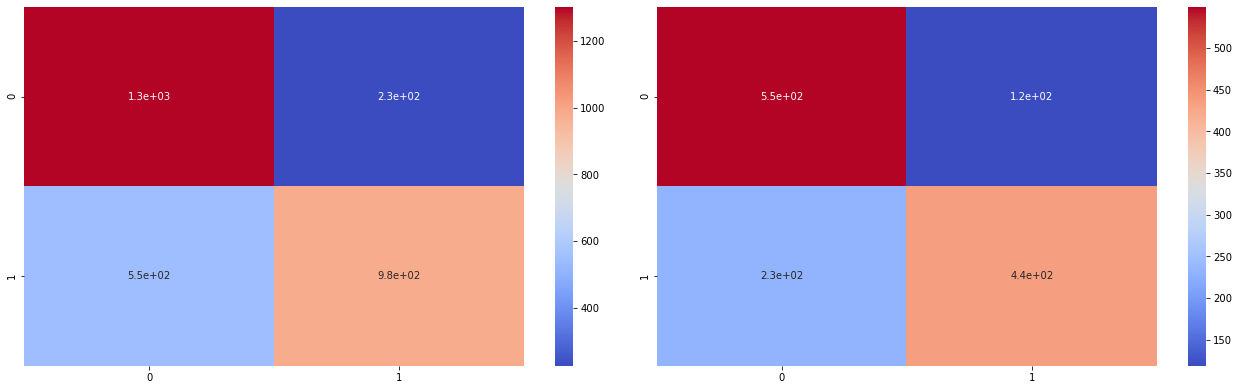

In [59]:
classification_metrics(y_train,y_pred_train,y_test,y_pred_test,True)

##### <span style="color:#00CC00"> The model is quite good, but we have a little bit of low recall

##### <span style="color:#FF7B07"> Let's see if we are able to reduce some features

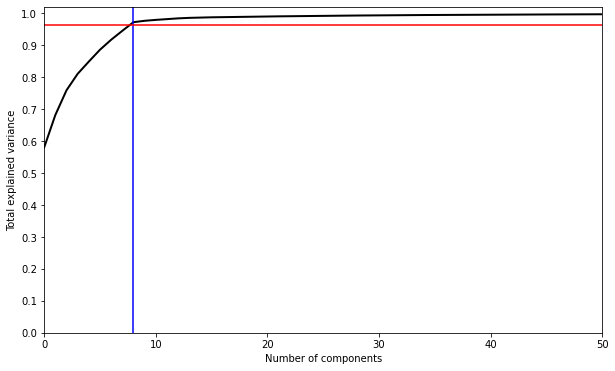

In [22]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 50)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b')
plt.axhline(0.965, c='r')
plt.show();

##### <span style="color:#00CC00"> This graph shows that we only need approximately 10 features to consist 98 % of data

# <span style="color:#FF7B07"><div align="center">**Reduce Data Features & Test** <a  name="4"></a>

##### <span style="color:#00CC00"> To reduce features, I write a method that will check every combination of features, <br> check average accuracy based on cross-validation also this method check Decision Tree depth range 2-6

In [23]:
# this method returns depth length and average accuracy based on cross validation

def get_accuracy_based_on_depth(depth_range,X_train,y_train,cv):
    accuracies = []
    for depth in depth_range:
        fold_accuracy = []
        tree_model = DecisionTreeClassifier(max_depth = depth,random_state = 42)

        for train_fold, valid_fold in cv.split(X_train):
            f_train_x = X_train.iloc[train_fold] 
            f_train_y = y_train.iloc[train_fold]

            f_valid_x = X_train.iloc[valid_fold]
            f_valid_y = y_train.iloc[valid_fold]

            model = tree_model.fit(X = f_train_x,y = f_train_y) # We fit the model with the fold train data
            valid_acc = model.score(X = f_valid_x,y = f_valid_y) # We calculate accuracy with the fold validation data
            fold_accuracy.append(valid_acc)

        avg = sum(fold_accuracy)/len(fold_accuracy)
        accuracies.append(avg)

    df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
    df = df[["Max Depth", "Average Accuracy"]]
    return df

In [24]:
# this method consider every subset of length two, 
# for all of them it finds the best depth (depth where the average accuracy is max) 
# and prints the metric if they are more than metric_threshold


def get_max_accuracy_based_on_features(X_train, X_test, y_train, y_test, col_set, metric_threshold = 0.7):
    cv = KFold(n_splits=10,shuffle = True,random_state=42)
    accuracies = list()

    X_train_temp = X_train.copy()
    X_test_temp = X_test.copy()
    depth_range = range(2, 6)
    
    test_feature_subset = list(itertools.combinations(col_set, 2))

    for sub in test_feature_subset:
        drop_col = list(filter(lambda x: (sub[0] in x) or (sub[1] in x), X_train_temp.columns))
        X_train = X_train_temp.drop(columns = drop_col)
        X_test = X_test_temp.drop(columns = drop_col)

        df = get_accuracy_based_on_depth(depth_range,X_train,y_train,cv)

        optimal_length = df[df['Average Accuracy']==df['Average Accuracy'].max()]['Max Depth'].values[0]
        decision_tree = DecisionTreeClassifier(max_depth=optimal_length,random_state=42)
        decision_tree.fit(X_train, y_train)
        y_pred_test = decision_tree.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred_test).round(2)
        precision = precision_score(y_test, y_pred_test).round(2)
        recall = recall_score(y_test, y_pred_test).round(2)
        f1 = f1_score(y_test, y_pred_test).round(2) 
        
        if ((accuracy>=metric_threshold) and (precision>=metric_threshold) and (recall>=metric_threshold) and (f1>=metric_threshold)):
            print(f"Accuracy: {accuracy}  Precision: {precision}  Recall: {recall}  F1:  {f1} --- {sub} Tree_depth {optimal_length}")

In [63]:
get_max_accuracy_based_on_features(X_train,X_test,y_train,y_test,{'_diff','total','calories','FoodGroup','sodium','sugar','fat','carbs','protein'})

Accuracy: 0.7  Precision: 0.7  Recall: 0.71  F1:  0.7 --- ('sugar', '_diff') Tree_depth 2
Accuracy: 0.7  Precision: 0.7  Recall: 0.71  F1:  0.7 --- ('sugar', 'carbs') Tree_depth 2
Accuracy: 0.7  Precision: 0.7  Recall: 0.71  F1:  0.7 --- ('_diff', 'total') Tree_depth 2
Accuracy: 0.71  Precision: 0.7  Recall: 0.72  F1:  0.71 --- ('carbs', 'total') Tree_depth 5
Accuracy: 0.7  Precision: 0.7  Recall: 0.71  F1:  0.7 --- ('protein', 'total') Tree_depth 5


##### <span style="color:#00CC00"> As we saw there are various combinations to reach max accuracy but I'm gonna choose to drop {carbs,total} becouse of 4 reasons:

- ##### <span style="color:#00CC00"> Without these features metrics are more than without other combinations above
- ##### <span style="color:#00CC00"> To drop column "total" is easy becouse we have it's information in _diff columns
- ##### <span style="color:#00CC00"> To drop colum  "carbs" is also easy becouse heatmap showed that carbs and calories were too much dependent
- ##### <span style="color:#00CC00"> The method is more general when depth will be 5 and won't be depended with only 2 features.

In [26]:
drop_col = list(filter(lambda x: ("carbs" in x) or ("total" in x), X_train.columns))
X_train = X_train.drop(columns=drop_col)
X_test = X_test.drop(columns=drop_col)
print(len(X_train.columns))

73


##### <span style="color:#FF7B07"> Features are too much and let's see if we could drop other features too. <br> We use first 10 days info as an input , it may be important only first(when user started to log) and 10th (when user adapted to log) days.

In [27]:
drop_col = list(filter(lambda x: ("_1" in x) or ("_2" in x) or ("_3" in x) or ("_4" in x) or ("_5" in x) or ("_6" in x) or ("_7" in x) or ("_8" in x), X_train.columns))
X_train = X_train.drop(columns=drop_col)
X_test = X_test.drop(columns=drop_col)

In [68]:
get_max_accuracy_based_on_features(X_train,X_test,y_train,y_test,{'_diff','calories','FoodGroup','sodium','sugar','fat','protein'})

Accuracy: 0.7  Precision: 0.7  Recall: 0.71  F1:  0.71 --- ('sodium', 'sugar') Tree_depth 4
Accuracy: 0.7  Precision: 0.7  Recall: 0.72  F1:  0.71 --- ('sodium', '_diff') Tree_depth 3
Accuracy: 0.71  Precision: 0.7  Recall: 0.73  F1:  0.71 --- ('sugar', 'calories') Tree_depth 4
Accuracy: 0.7  Precision: 0.7  Recall: 0.72  F1:  0.71 --- ('sugar', '_diff') Tree_depth 3
Accuracy: 0.71  Precision: 0.7  Recall: 0.73  F1:  0.71 --- ('sugar', 'protein') Tree_depth 4
Accuracy: 0.7  Precision: 0.7  Recall: 0.72  F1:  0.71 --- ('calories', '_diff') Tree_depth 3
Accuracy: 0.7  Precision: 0.7  Recall: 0.72  F1:  0.71 --- ('_diff', 'protein') Tree_depth 3
Accuracy: 0.7  Precision: 0.7  Recall: 0.72  F1:  0.71 --- ('_diff', 'fat') Tree_depth 3


##### <span style="color:#00CC00"> As we see, data had too much noise and after reducing features, we have 8 combinations which we can drop. <br> We choose to drop {protein, sugar} because recall is rised and also tree depth is quite well too.

In [29]:
drop_col = list(filter(lambda x: ("protein" in x) or ("sugar" in x), X_train.columns))
X_train = X_train.drop(columns=drop_col)
X_test = X_test.drop(columns=drop_col)

In [30]:
decision_tree = DecisionTreeClassifier(max_depth=4,random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

##### <span style="color:#FF7B07"> Features quantity is reduced and let's see the visualization of decision tree

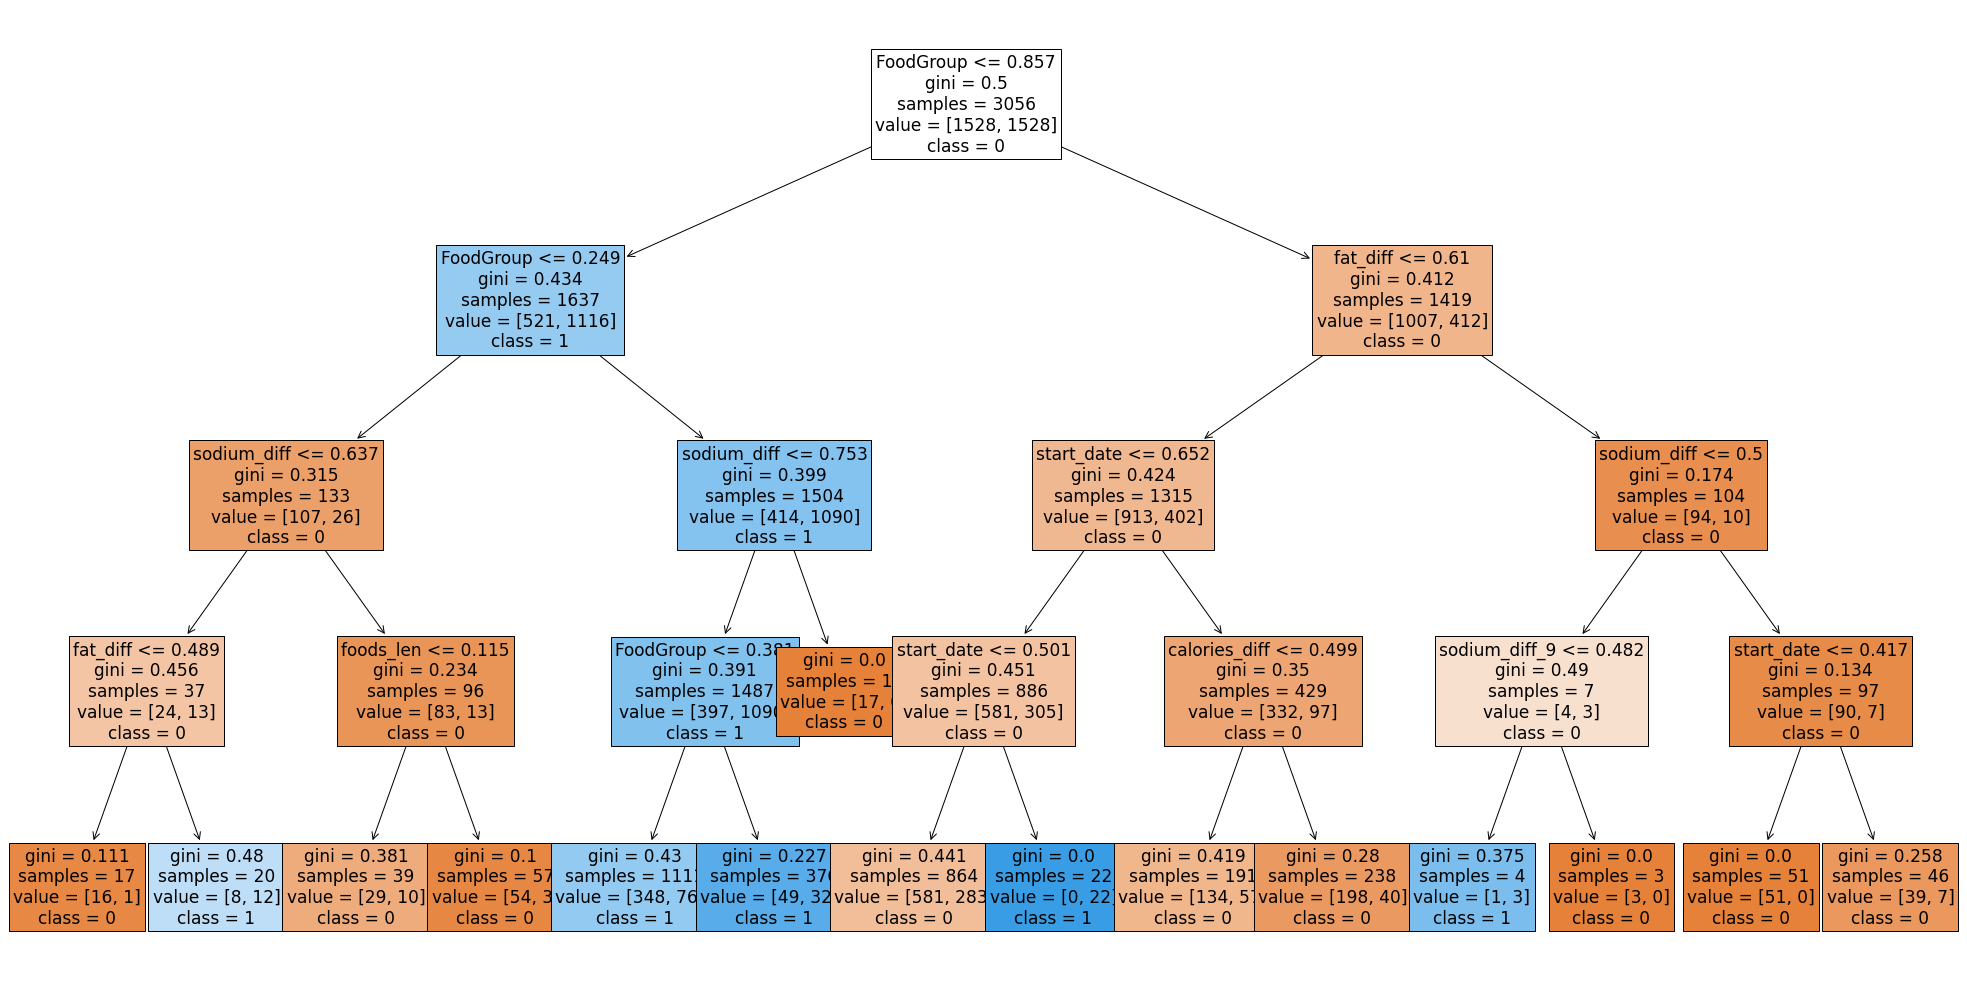

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(35,18))
_ = tree.plot_tree(decision_tree, feature_names=X_train.columns,class_names=['0','1'],filled=True,fontsize = 17)

train data:	  						test data:	

accuracy:	 0.74 						accuracy:	 0.71
precision:	 0.74 						precision:	 0.7
recall:		 0.74 						recall:		 0.73
F1:		 0.74 						F1:		 0.71


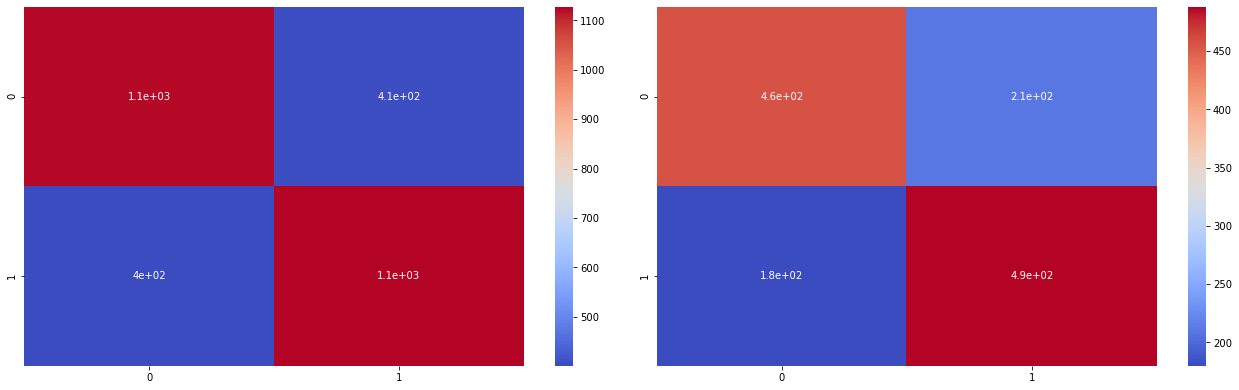

In [33]:
classification_metrics(y_train,y_pred_train,y_test,y_pred_test,True)

In [34]:
print(f"used features:\n {X_train.columns.values}")

used features:
 ['foods_len' 'healtyDistrib' 'calories_diff' 'fat_diff' 'sodium_diff'
 'foods_len_9' 'healtyDistrib_9' 'calories_diff_9' 'fat_diff_9'
 'sodium_diff_9' 'start_date' 'days_missed' 'FoodGroup']


##### <span style="color:#00CC00"> We can notice that features quantity is really reduced ( there are 13 of them) but despite this, metrics are same as the baseline model. <br> Also decision tree is depth of 4 and the model is not depended only 1 or 2 features. <br> Also, the fun fact is that all of the rest features are produced by us

##### <span style="color:#FF7B07"> Becouse of the reduced features we can now implement logistic regression too and see the results of it.

In [35]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train data:	  						test data:	

accuracy:	 0.66 						accuracy:	 0.65
precision:	 0.66 						precision:	 0.64
recall:		 0.66 						recall:		 0.68
F1:		 0.66 						F1:		 0.66


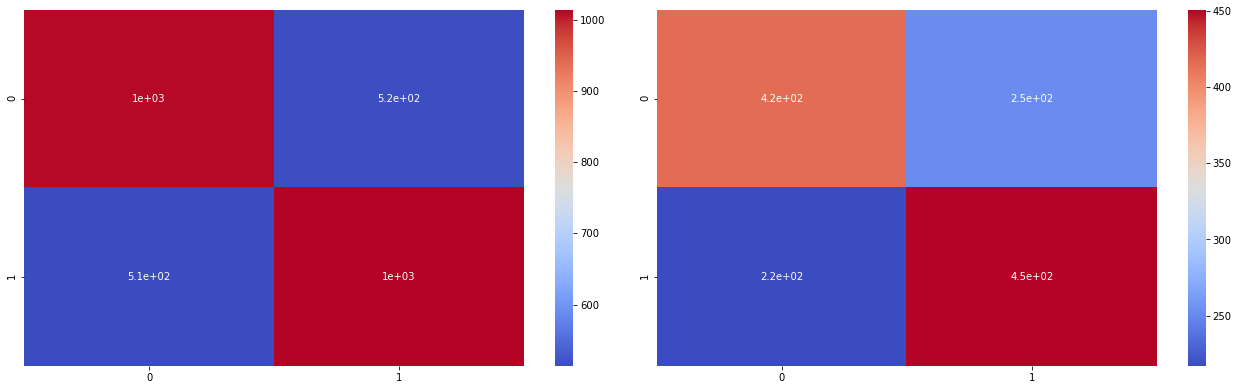

In [36]:
classification_metrics(y_train,y_pred_train,y_test,y_pred_test,True)

##### <span style="color:#00CC00"> As we see the result of logistic regression is a bit worse than decision tree . May be the reason is that data is complex and model didn't adapted the data

# <span style="color:#FF7B07"><div align="center">**Summary** <a  name="5"></a>

#### <span style="color:#00CC00"> In this notebook we predicted if the user will reach a goal or not. <br> 
- ##### <span style="color:#00CC00"> Firstly we run baseline model and see the result. 
- ##### <span style="color:#00CC00"> After that, because of the large quantity of features, we tried to reduce data with various techniques 
- ##### <span style="color:#00CC00"> and at last, we have 13 features and get same metrics as baseline model 
- ##### <span style="color:#FF7B07"> Accuracy: 0.71 Precision: 0.70 Recall: 0.73 F1: 0.71